<a href="https://colab.research.google.com/github/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/ACD_T2_EDA_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# Lab Análise Exploratória de Dados (EDA) 
---


## Caso: **Onde comprar imóveis em Melbourne (Austrália)?**

Empregue os dados da URL: http://meusite.mackenzie.br/rogerio/TIC/Melbourne_housing_FULL.csv

A análise de dados tem uma grande aplicação no mercado de imóveis, seja para projetar oportunidades de negócios (como que tipo de imóvel e onde construir), seja para responder a questões mais simples (onde encontro melhores oportunidade de imóveis de 2 dormitórios). Ao final desse Lab você será capaz de responder algumas dessas perguntas explorando uma base com cerca de 35K registros sobre negócios de imóveis em Melbourne. 

# **Exercício 0.** Semântica dos Dados

Essa é uma parte importante da exploração dos dados mas as informações precisam por algum tipo de documentação dos dados. Analise algumas informações dos dados aqui...

[Melbourne Housing Market](https://www.kaggle.com/anthonypino/melbourne-housing-market)



# **Exercício 1**. Imports e Aquisição dos Dados

Faça aqui os imports para a construção da sua EDA. Em seguida faça a dos dados. Lembre-se de verificar a origem dos dados para empregar as funções e parâmetros corretos de leitura dos dados (extensão do arquivo, headers, separador etc.).




## imports

In [ ]:
# seu código


## Aquisição dos dados

In [2]:
# seu código


# **Exercício 2**. Explore a Estrutura dos Dados

Quantos registros e atributos tem? Qual o aspecto dos dados? Quais os tipos dos dados (categóricos, numéricos)? 



In [ ]:
# seu código


# **Exercício 3** Examine Estatísticas dos Dados Brutos

Verifique por exemplo:

1. Qual a média de preços
2. Qual o ano da construção mais antiga e a mais recente? O que você conclui? 
3. Quantas regiões há e qual a região com mais casas à venda? 


In [ ]:
# seu código


Qual o ano da construção mais antiga e a mais recente? O que você conclui? 

Aqui certamente há um erro nos dados. A EDA é uma etapa importante na verificação da qualidade dos dados.

# **Exercício 4.** Verifique Dados Faltantes

Existem dados faltantes? O que você pode afirmar sobre o número de linhas com valores nulos? 

**DICA:** ` _ .isnull(). _`


In [ ]:
# seu código

# **Exercício 4b.** Obtenha a Média de Valores de `Price` (**RESOLVIDO**)

Em paralelo obtenha o percentual de valores nulos. O que você conclui? 


In [13]:
houses.Price.mean()
houses.Price.isnull().sum() / houses.Price.count()

0.27929680331779644

É um percentual de valores nulos muito alto e que certamente compromete o valor da média. Por isso, mesmo em uma questão simples, é sempre bom verificar a qualidade dos dados.

# **Exercício 5**. Tratando Dados Nulos 

Antes, discuta as estratégias de tratamento de nulos para `Price`. Em seguida, por simplicidade, aplique a estratégia de imputar os valores médios para `Price` e `Landsize`.

**DICA:** `_ replace(np.NaN, _)` ou ` .fillna() `

In [ ]:
# seu código

# **Exercício 6** 

Por quantas Regiões estão distribuídas as casas de Melbourne? Qual o percentual da Região com mais casas vendidas?

**DICA:** use `_.unique()` , `_.value_counts()`, `.groupby()`


In [ ]:
# seu código

# **Exercício 7** 

Examine a questão anterior graficamente.

**DICA:** `sns.countplot()` ou `sns.barplot`


In [ ]:
# seu código

# **Exercício 8** **(RESOLVIDO)**

Quais os 5 preços maiores e menores preços dos imóveis? 



In [36]:
houses.Price.nlargest(5) 
houses.Price.nsmallest(5) 

4378      85000.0
29669    112000.0
17529    121000.0
3063     131000.0
3290     145000.0
Name: Price, dtype: float64

# **Exercício 9** 

Qual o maior e menor preço dos imóveis? De que região é cada um desses imóveis?



In [ ]:
# seu código

# **Exercício 10** 

Como estão distribuídos os preços dos imóveis? (Faça um gráfico)

In [ ]:
# seu código

# **Exercício 11** Discussão 

Você nota algo estranho nessa distribuição? Como você corrigiria isso? 

Veja que existe um valor que se sobressai. É o valor médio que foi imputado para os valores nulos. Esse é o risco de se imputar os valores.

Uma estratégia seria a de imputar valores aleatórios com a mesma distribuição e média dos valores existentes. Algo não complexo, mas que requer alguma programação adicional. A solução está abaixo, mas não tem necessidade de você compreender o código, mas entenda ao menos o raciocínio empregado.





In [75]:
houses2 = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Melbourne_housing_FULL.csv')
houses2.Price.isnull().sum()

7610

In [76]:
for i in range(len(houses2)):
 if np.isnan(houses2.loc[i].Price):
    new_price = houses2.loc[np.random.randint(0,len(houses2))].Price
    while np.isnan(new_price):
      new_price = houses2.loc[np.random.randint(0,len(houses2))].Price
    houses2.at[i,'Price'] = new_price

houses2.Price.isnull().sum()

0

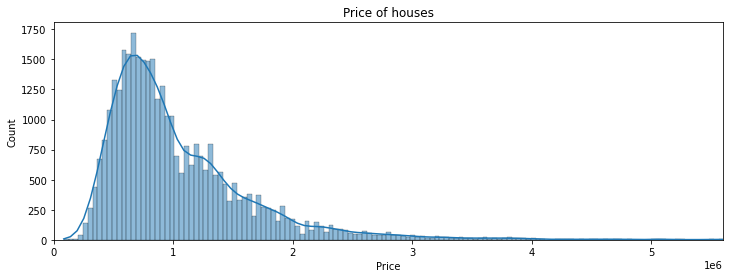

In [78]:
plt.figure(figsize=(12,4))
sns.histplot(houses2.Price,kde=True)
plt.title('Price of houses')
plt.xlim([0, 0.5*houses2.Price.max()])
plt.show()

Mesmo assim, note que esse tipo de atribuição fará com que imóveis com mais metros quadrados e melhor região ainda possam receber um valor aleatório de um imóvel menor e de uma região menos valorizada! Neste caso uma interpolação de valores poderia fazer mais sentido. Mas não vamos seguir aqui com essa solução. Aqui o que importa é a discussão e a reflexão sobre os dados (*Data Thinking*).

# **Exercício 12**. **(RESOLVIDO)**

Compare as distribuições de preços das regiões de 'Western Metropolitan' e 'Southern Metropolitan'. O que você pode afirmar?

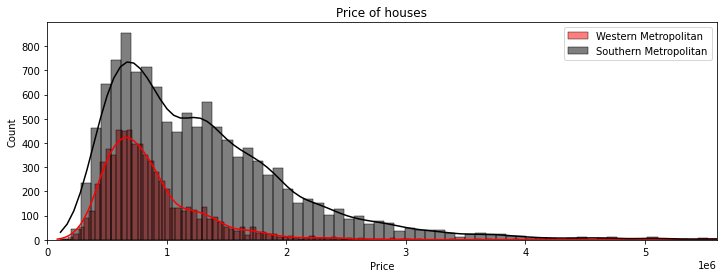

In [87]:
# Código resolvido, você não precisa codificar nada aqui. Apenas analise e responda a pergunta.

plt.figure(figsize=(12,4))
sns.histplot(houses2[houses2.Regionname == 'Western Metropolitan'].Price,kde=True,color='r',
             label = 'Western Metropolitan')
sns.histplot(houses2[houses2.Regionname == 'Southern Metropolitan'].Price,kde=True,color='k',
             label = 'Southern Metropolitan')
plt.title('Price of houses')

plt.xlim([0, 0.5*houses2.Price.max()])
plt.legend()

plt.show()

Há mais venda de imóveis 'Southern Metropolitan' mas a distribuição de preços é bastante semelhante a da 'Western Metropolitan'.

# **Exercício 13**. **(RESOLVIDO)**

Imóveis com mais dormitórios são mais caros? Exiba em um gráfico  

**DICA:** `df.groupby()` e `sns.barplot()`

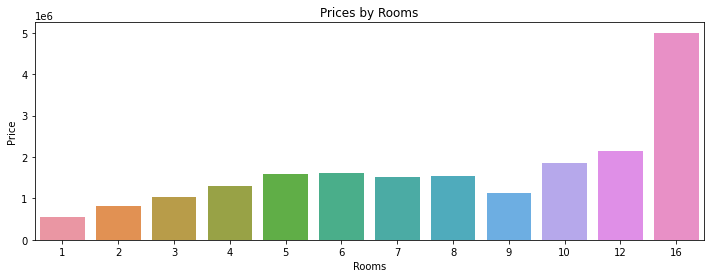

In [88]:
housesRooms = houses.groupby('Rooms').Price.mean()

plt.figure(figsize=(12,4))
sns.barplot(housesRooms.index, housesRooms)
plt.title('Prices by Rooms')
plt.show()

# **Exercício 14**. 

Imóveis com maior área, são mais caros? Exiba em um gráfico

**DICA:** Aqui você não pode empregar o `barplot()` (por que?). Empregue um gráfico de *dispersão* do `sns` (qual é?)

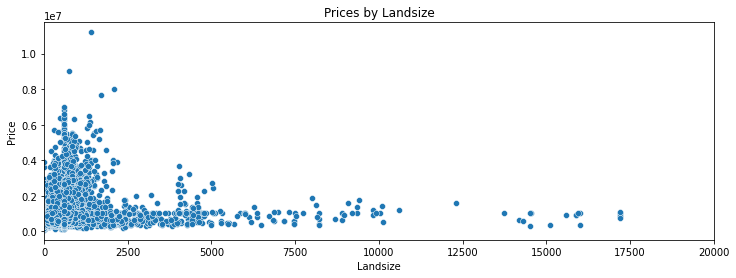

In [89]:
# seu código

# **Exercício 15**. **(RESOLVIDO)**

Um Cliente quer comprar um apartamento de 1 dormitório. Ele deseja comprar em uma região em que o valor do imóvel seja mais próximo dos valores de  imóveis com com 2 dormitórios, pois pretende casar no próximo ano e isso seria portanto mais cômodo para uma troca. Qual região você recomendaria o cliente comprar? 

**DICA:** 
Empregue um `boxplot()`
1. Crie um data frame somente com os registro de imóveis com 1 e 2 dormitórios
1. Faça um então um `boxplot()` do preço por região
1. Inclua o parâmetro `hue` para `Rooms` (ver Teoria Trilha 4)

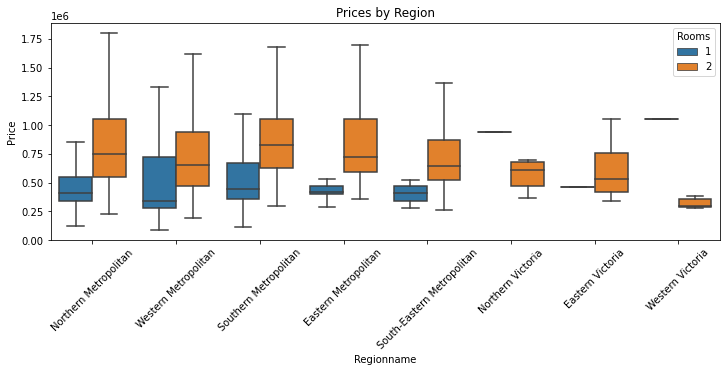

In [90]:
houses2 = houses[houses.Rooms<=2]
plt.figure(figsize=(12,4))
sns.boxplot('Regionname','Price',data=houses2,hue='Rooms',showfliers=False)
plt.title('Prices by Region')
plt.xticks(rotation=45)
plt.show()

Na região 'Western Metropolitan' os preços de imóveis de 1 e 2 dormitórios têm mais coincidências.

# **Exercício 16**. 

Um cliente quer fazer um investimento e deseja comprar um imóvel com o maior número de cômodos. Sendo imóvel para investimento ele procura algo com a maior variabilidade possível de preço (pois pretende comprar pelo preço menor e vender daqui um ano pelo preço maior). Que tipo de imóvel você sugere ao cliente (Type = h(ouse),u(nit, ou apartamento), t(ower, sobrado)).

**DICA:** Empregue como modelo a solução do exercício anterior. 

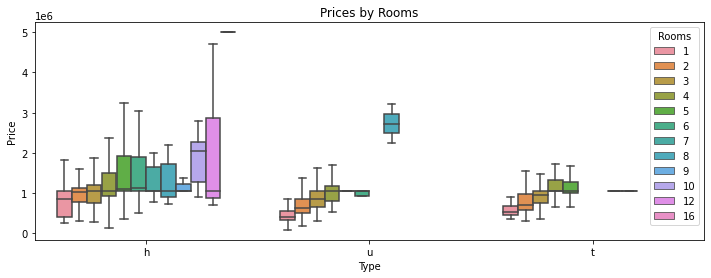

In [91]:
# seu código


Casas com mais dormitórios apresentam variabilidade maior de preço.

# **Conclusão** 

Em geral um EDA apresenta algum tipo de conclusão. Sendo aqui apenas um exercício poderíamos concluir nossa análise:

> Os imóveis da Região Sul são os mais caros havendo também a maior oferta de imóveis. O preços tem forte influência da região e as casas apresentam um espectro maior de preços (variação). A ausência de preço para um grande número de imóveis é um fator a ser revisado na análise.
